## Часть 1: Прототипирование и выбор модели

1. Выполните первичный анализ данных:
- Определите тип задачи (классификация, регрессия, кластеризация)
- Проведите EDA (распределение целевой переменной, корреляции)
- Выявите проблемы с данными (пропуски, skew, шум)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(f"../data/hospital_readmissions_30k.csv")
df.head()

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No


Целевая переменная - readmitted_30_days

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix, roc_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.shape

(30000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             30000 non-null  int64  
 1   age                    30000 non-null  int64  
 2   gender                 30000 non-null  object 
 3   blood_pressure         30000 non-null  object 
 4   cholesterol            30000 non-null  int64  
 5   bmi                    30000 non-null  float64
 6   diabetes               30000 non-null  object 
 7   hypertension           30000 non-null  object 
 8   medication_count       30000 non-null  int64  
 9   length_of_stay         30000 non-null  int64  
 10  discharge_destination  30000 non-null  object 
 11  readmitted_30_days     30000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.7+ MB


In [6]:
df.describe()

,patient_id,age,cholesterol,bmi,medication_count,length_of_stay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,53.884233,225.260400,28.946263,5.012267,5.502900
std,8660.398374,21.056485,43.585671,6.348204,3.166383,2.867298
min,1.000000,18.000000,150.000000,18.000000,0.000000,1.000000
25%,7500.750000,36.000000,188.000000,23.400000,2.000000,3.000000
50%,15000.500000,54.000000,225.000000,28.900000,5.000000,5.000000
75%,22500.250000,72.000000,263.000000,34.500000,8.000000,8.000000
max,30000.000000,90.000000,300.000000,40.000000,10.000000,10.000000


In [7]:
df.isnull().sum()

patient_id               0
age                      0
gender                   0
blood_pressure           0
cholesterol              0
bmi                      0
diabetes                 0
hypertension             0
medication_count         0
length_of_stay           0
discharge_destination    0
readmitted_30_days       0
dtype: int64

In [8]:
print("Распределение целевой переменной 'readmitted_30_days':")
print(df['readmitted_30_days'].value_counts())
print("\nДоли:")
print(df['readmitted_30_days'].value_counts(normalize=True))

Распределение целевой переменной 'readmitted_30_days':
readmitted_30_days
No     26326
Yes     3674
Name: count, dtype: int64

Доли:
readmitted_30_days
No     0.877533
Yes    0.122467
Name: proportion, dtype: float64


In [9]:
# Анализ категориальных переменных
categorical_cols = ['gender', 'blood_pressure', 'diabetes', 'hypertension', 'discharge_destination']
print("Анализ категориальных переменных:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Анализ категориальных переменных:

gender:
gender
Male      10097
Other     10024
Female     9879
Name: count, dtype: int64

blood_pressure:
blood_pressure
143/94     41
130/97     33
110/98     33
141/90     33
120/77     33
           ..
117/85      9
113/79      8
115/81      8
126/100     8
149/80      7
Name: count, Length: 1581, dtype: int64

diabetes:
diabetes
No     15051
Yes    14949
Name: count, dtype: int64

hypertension:
hypertension
No     15022
Yes    14978
Name: count, dtype: int64

discharge_destination:
discharge_destination
Home                20877
Rehab                6096
Nursing_Facility     3027
Name: count, dtype: int64


Анализ числовых переменных:


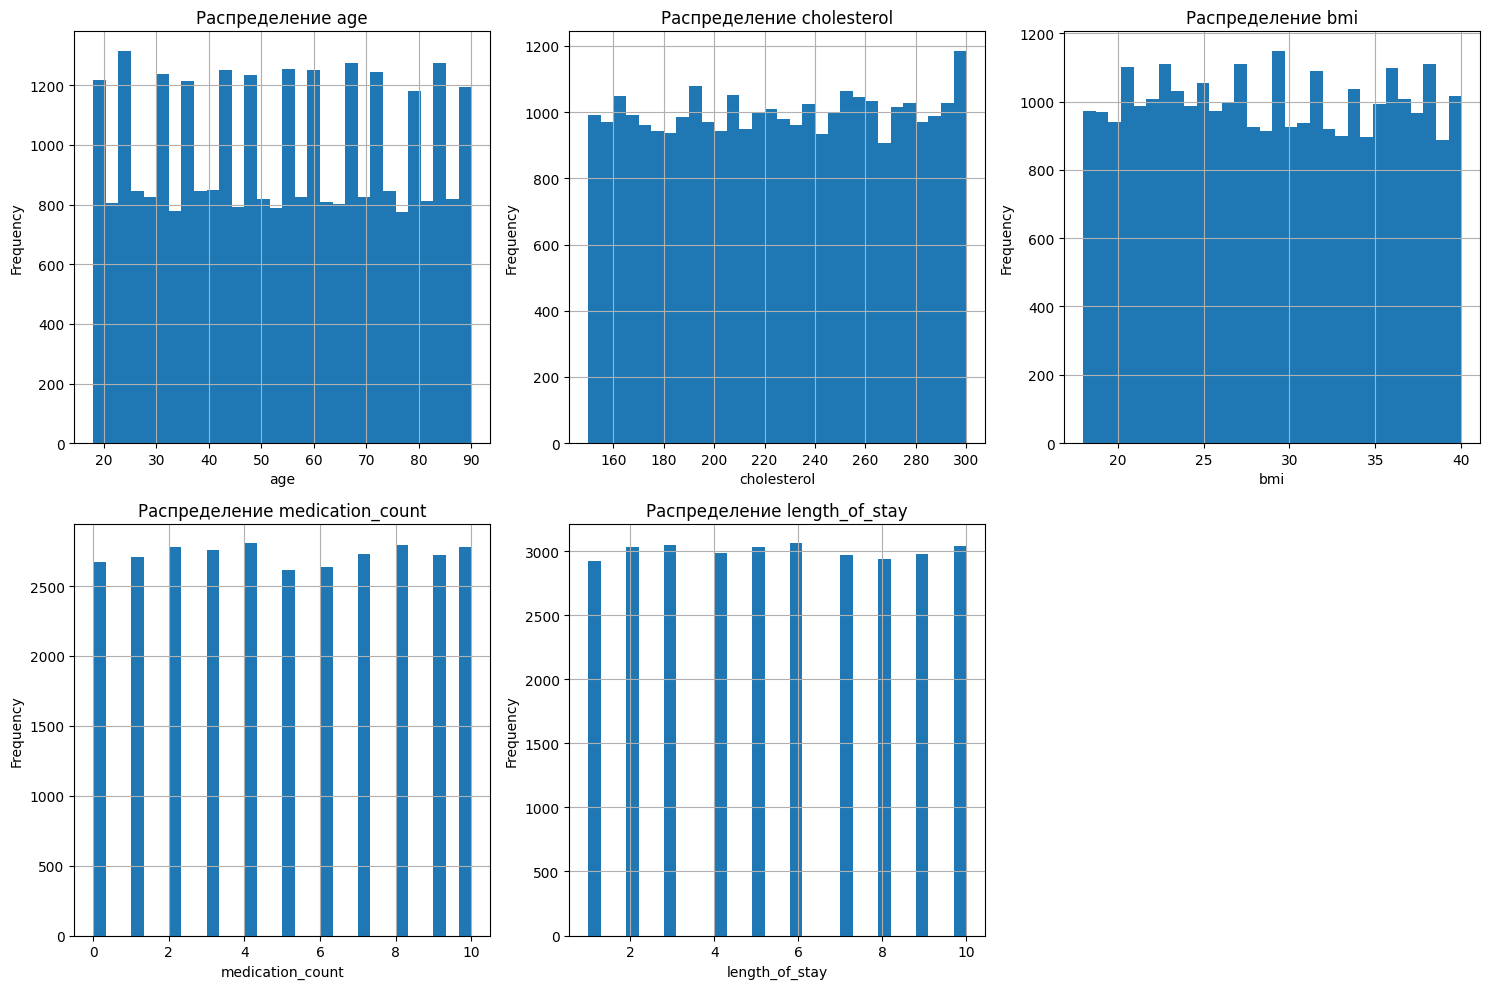

In [10]:
# Анализ числовых переменных
numerical_cols = ['age', 'cholesterol', 'bmi', 'medication_count', 'length_of_stay']
print("Анализ числовых переменных:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Удаляем пустой subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [11]:
# Анализ выбросов
print("Выбросы (значения за пределами Q1-1.5*IQR и Q3+1.5*IQR):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} выбросов ({len(outliers)/len(df)*100:.2f}%)")

Выбросы (значения за пределами Q1-1.5*IQR и Q3+1.5*IQR):
age: 0 выбросов (0.00%)
cholesterol: 0 выбросов (0.00%)
bmi: 0 выбросов (0.00%)
medication_count: 0 выбросов (0.00%)
length_of_stay: 0 выбросов (0.00%)


In [13]:
# Преобразование данных для корреляционного анализа
df_encoded = df.copy()

le = LabelEncoder()
categorical_columns = ['gender', 'diabetes', 'hypertension', 'discharge_destination', 'readmitted_30_days']
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
# Разделяем давление на систолическое и диастолическое
df_encoded['systolic_bp'] = df_encoded['blood_pressure'].str.split('/').str[0].astype(int)
df_encoded['diastolic_bp'] = df_encoded['blood_pressure'].str.split('/').str[1].astype(int)

df_encoded = df_encoded.drop(['blood_pressure'], axis=1)

In [14]:
df_corr = df_encoded.drop(['patient_id'], axis=1)
df_corr.head()

,age,gender,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days,systolic_bp,diastolic_bp
0,74,2,240,31.5,1,0,5,1,1,1,130,72
1,46,0,292,36.3,0,0,4,3,1,0,120,92
2,89,2,153,30.3,0,1,1,1,0,0,135,78
3,84,0,153,31.5,0,1,3,10,0,0,123,80
4,32,2,205,18.4,0,1,6,4,1,0,135,84


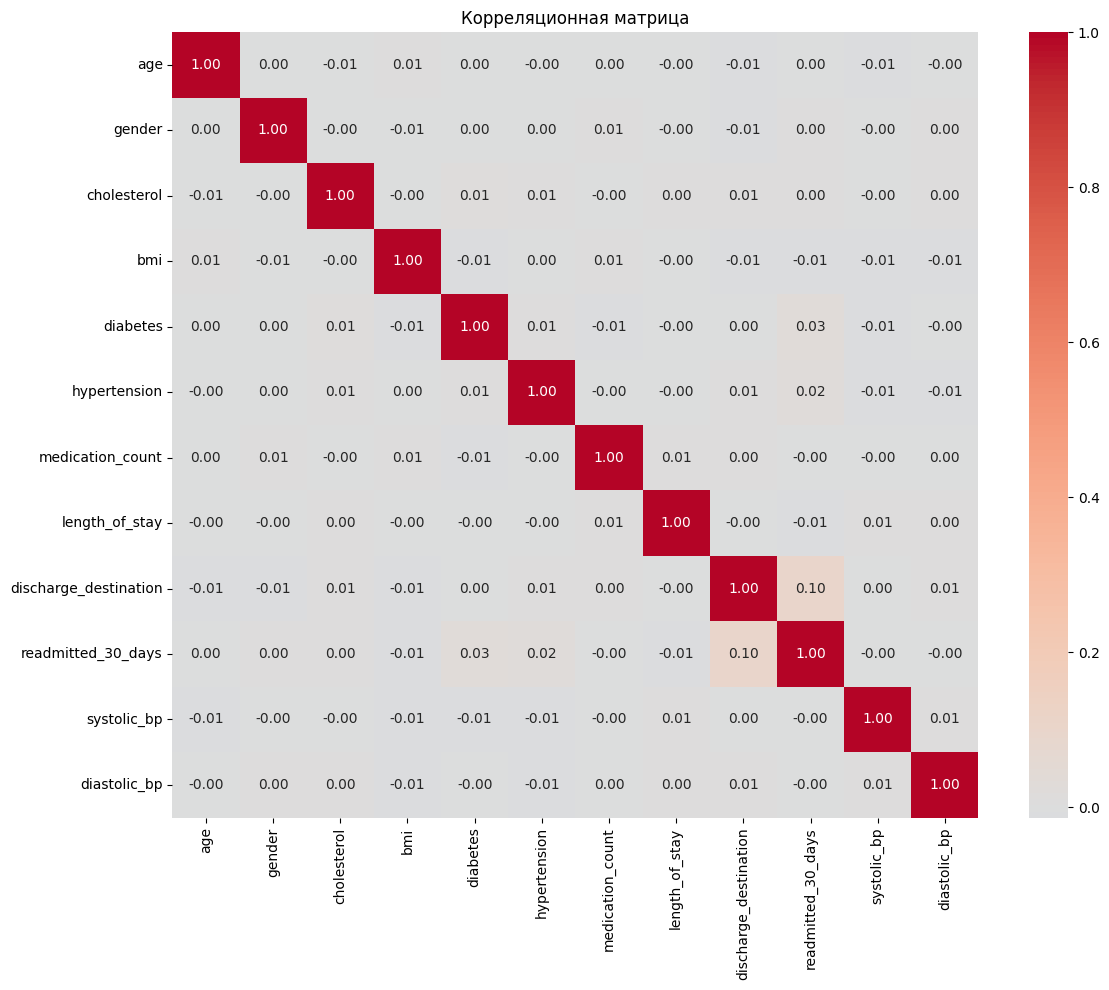

In [15]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

In [16]:
target_correlations = correlation_matrix['readmitted_30_days'].sort_values(key=abs, ascending=False)
print("Корреляции с целевой переменной (по абсолютному значению):")
print(target_correlations.head(15))

Корреляции с целевой переменной (по абсолютному значению):
readmitted_30_days       1.000000
discharge_destination    0.097919
diabetes                 0.029538
hypertension             0.022511
bmi                     -0.013472
length_of_stay          -0.006655
cholesterol              0.003983
systolic_bp             -0.003442
gender                   0.002652
diastolic_bp            -0.002012
age                      0.000436
medication_count        -0.000099
Name: readmitted_30_days, dtype: float64


2. Сравните несколько моделей:
- Обучите 3-5 моделей на сэмпле данных
- Сравните по выбранным метрикам (AUC, F1, MAPE)
- Выберите лучшую модель для дальнейшей работы

In [17]:
X = df_encoded.drop(['patient_id', 'readmitted_30_days'], axis=1)
y = df_encoded['readmitted_30_days']

print(f"Размер признакового пространства: {X.shape}")
print(f"Целевая переменная: 1 - {sum(y==1)}, 0 - {sum(y==0)}")
print(f"Доля положительного класса: {y.mean():.3f}")

Размер признакового пространства: (30000, 11)
Целевая переменная: 1 - 3674, 0 - 26326
Доля положительного класса: 0.122


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")
print(
    f"Class balance in train: {y_train.value_counts(normalize=True).to_dict()}")

Train size: (21000, 11)
Test size: (9000, 11)
Class balance in train: {0: 0.8780476190476191, 1: 0.12195238095238095}


In [20]:
numerical_features = ['age', 'cholesterol', 'bmi', 'medication_count', 'length_of_stay', 'systolic_bp', 'diastolic_bp']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [21]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Neighbors': KNeighborsClassifier()
}

In [22]:
results = []

for name, model in models.items():
    print(f"Обучение {name}")
    
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = model.predict(X_test_scaled)

    auc = roc_auc_score(y_test, y_pred_proba)
    acc = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'AUC': auc,
        'Accuracy': acc
    })

Обучение Logistic Regression
Обучение Random Forest
Обучение Gradient Boosting
Обучение K-Neighbors


In [24]:
# Сравнение результатов
results_df = pd.DataFrame(results)
print("Сравнение моделей:")
results_sorted = results_df.sort_values('AUC', ascending=False)
print(results_sorted)

Сравнение моделей:
                 Model       AUC  Accuracy
2    Gradient Boosting  0.564103  0.876222
0  Logistic Regression  0.559245  0.876333
1        Random Forest  0.547543  0.876333
3          K-Neighbors  0.518264  0.865000


AUC относительно низкий. Нужно проводить feature engineering

Можно взять Gradient Boosting для дальнейшей работы

3. Реализуйте базовый пайплайн:

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier

numerical_features_pipe = ['age', 'cholesterol', 'bmi', 'medication_count', 'length_of_stay', 'systolic_bp', 'diastolic_bp']
categorical_features_pipe = ['gender', 'diabetes', 'hypertension', 'discharge_destination']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
])

# Объединим преобразователи в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features_pipe),
        ('cat', categorical_transformer, categorical_features_pipe)
    ])

# Создадим pipeline для Gradient Boosting
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


4. Залогируйте эксперимент в MLflow:

In [ ]:
import mlflow

# Настраиваем MLflow для работы с SQLite
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("Hospital_Readmission_Prediction")

print(f"Tracking URI: {mlflow.get_tracking_uri()}")

2025/11/19 13:30:24 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/11/19 13:30:24 INFO mlflow.store.db.utils: Updating database tables
2025-11-19 13:30:24 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-11-19 13:30:24 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-11-19 13:30:24 INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
2025-11-19 13:30:24 INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025-11-19 13:30:24 INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025-11-19 13:30:24 INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025-11-19 13:30:24 INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025-11-19 13:30:24 INFO  [alembic.runtime.mig

Tracking URI: sqlite:///mlflow.db


In [40]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import roc_auc_score, accuracy_score

# Логируем эксперимент
with mlflow.start_run():
    # Параметры
    mlflow.log_param("model", "GradientBoosting")
    mlflow.log_param("random_state", 42)
    
    # Обучаем модель
    gb_pipeline.fit(X_train, y_train)

    # Предсказания и метрики
    y_pred = gb_pipeline.predict(X_test)
    y_pred_proba = gb_pipeline.predict_proba(X_test)[:, 1]
    
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Логируем метрики
    mlflow.log_metric("auc", auc)
    mlflow.log_metric("accuracy", accuracy)
    
    # Сохраняем модель
    mlflow.sklearn.log_model(gb_pipeline, "model")
    
    print(f"AUC: {auc:.4f}")

2025/11/19 14:19:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/19 14:19:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


AUC: 0.5620


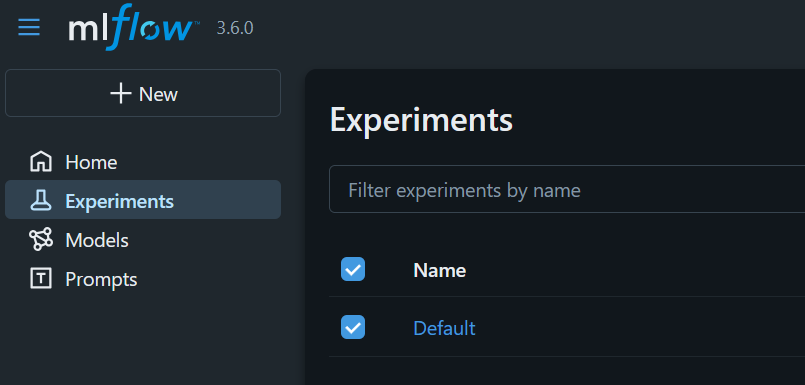